# MOVIE STUDIO ANALYSIS 

<img src="images/moviedog.jpg" style="width:100%; height:auto;">

We will be using the following datasets

1. `rt.reviews.tsv` from [rotten tomatoes](https://www.rottentomatoes.com/)
2. `rt.movie_info.tsv` from [rotten tomatoes](https://www.rottentomatoes.com/)
2. `im.db` from [IMDB](https://www.imdb.com/)
3. `bom.movie_gross.csv` from [Box Office Mojo](https://www.boxofficemojo.com/)

In [2]:
# Import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [26]:
# Loading reviews Dataset

# reviews Dataset
file_path = 'data/rt.reviews.tsv'

try:
    review_df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip', encoding='ISO-8859-1')
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [27]:
# loading imdb database
conn = sqlite3.connect('data/im.db') 

q_movie_basics = """SELECT * 
FROM movie_basics
      JOIN movie_ratings 
      ON movie_basics.movie_id = movie_ratings.movie_id;
      """
movie_basics_df = pd.read_sql(q_movie_basics, conn)

movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [5]:
# Loading Box Office Mojo Dataset 
path = 'data/bom.movie_gross.csv'
movie_gross_df = pd.read_csv(path)

In [36]:
# Loading movie info dataset to dataframe
path = 'data/rt.movie_info.tsv'
movie_info_df = pd.read_csv(path, sep='\t', on_bad_lines='skip', encoding='ISO-8859-1')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [33]:
# Loading 'The Numbers' Dataset
path = 'data/tn.movie_budgets.csv'
movie_budgets_df = pd.read_csv(path)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Cleaning the dataset

1. review_df

In [30]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [29]:
# checking null values in dataset
review_df.isnull().sum()

# checking whether each column has an appropriate data type
review_df.dtypes

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

## Merging review_df and movie_info_df

In [40]:
# Using the merge() function in pandas to merge the two datasets on a common column.

merged_df = pd.merge(review_df, movie_info_df, on='id', how='inner')

merged_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [41]:
# Dropping the following columns: review, critic, top_critic, publisher, synopsis, 
# writer, & studio columns from 'merged_df' dataframe

merged_df = merged_df.drop(['review', 'critic', 'top_critic', 'publisher', 'synopsis', 'writer', 'studio'], axis=1)

merged_df.head()

,id,rating_x,fresh,date,rating_y,genre,director,theater_date,dvd_date,currency,box_office,runtime
0,3,3/5,fresh,"November 10, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
1,3,NaN,rotten,"May 23, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
2,3,NaN,fresh,"January 4, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
3,3,NaN,fresh,"November 16, 2017",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
4,3,NaN,fresh,"October 12, 2017",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes


In [43]:
# change column names from 'rating_x' to 'star_rating' and 'rating_y' to 'MPAA_rating'

merged_df.rename(columns={'rating_x': 'star_rating', 'rating_y': 'MPAA_rating'}, inplace=True)
merged_df.head()

,id,star_rating,fresh,date,MPAA_rating,genre,director,theater_date,dvd_date,currency,box_office,runtime
0,3,3/5,fresh,"November 10, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
1,3,NaN,rotten,"May 23, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
2,3,NaN,fresh,"January 4, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
3,3,NaN,fresh,"November 16, 2017",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
4,3,NaN,fresh,"October 12, 2017",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes


In [44]:
# checking null values in merged_df 
merged_df.isnull().sum()

id                  0
star_rating     13517
fresh               0
date                0
MPAA_rating        86
genre              87
director         5440
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
dtype: int64

In [46]:
# create 'merged_df1' from 'merged_df' where 'star_rating' is not null

merged_df1 = merged_df[merged_df['star_rating'].notnull()]
merged_df1

,id,star_rating,fresh,date,MPAA_rating,genre,director,theater_date,dvd_date,currency,box_office,runtime
0,3,3/5,fresh,"November 10, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
6,3,C,rotten,"July 17, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
7,3,2/5,rotten,"April 21, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
11,3,B-,fresh,"February 3, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
12,3,2/4,rotten,"January 15, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...
54424,2000,1.5/5,rotten,"September 26, 2002",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes
54428,2000,1/5,rotten,"September 21, 2005",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes
54429,2000,2/5,rotten,"July 17, 2005",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes
54430,2000,2.5/5,rotten,"September 7, 2003",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes


In [47]:
# check unique ratings in 'star_rating' column

merged_df1['star_rating'].unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
       

In [53]:
# Function to convert star ratings to a 0-10 scale
def convert_rating(rating):
    if pd.isna(rating):
        return np.nan
    
    # Handle mixed fractions (e.g., '3 1/2')
    if ' ' in rating and '/' in rating:
        whole, frac = rating.split(' ')
        num, denom = frac.split('/')
        return (float(whole) + float(num) / float(denom)) * 10 / (10 / float(denom))
    
    # Convert fraction ratings (e.g., '3/5')
    if '/' in rating:
        num, denom = rating.split('/')
        num = float(num)
        denom = float(denom)
        return (num / denom) * 10
    
    # Convert letter grades
    letter_grades = {
        'A+': 10, 'A': 9.5, 'A-': 9,
        'B+': 8.5, 'B': 8, 'B-': 7.5,
        'C+': 7, 'C': 6.5, 'C-': 6,
        'D+': 5.5, 'D': 5, 'D-': 4.5,
        'F': 2.5, 'F+': 2, 'F-': 1.5
    }
    if rating in letter_grades:
        return letter_grades[rating]
    
    # Handle unconventional ratings ('N', 'R', etc.)
    unconventional_ratings = {
        'N': np.nan, 'R': np.nan  # Treat as missing values or set specific values
    }
    if rating in unconventional_ratings:
        return unconventional_ratings[rating]
    
    # Convert direct numeric ratings if within the range
    try:
        value = float(rating)
        if 0 <= value <= 10:
            return value
    except ValueError:
        pass
    
    return np.nan

# Apply conversion function to the star_rating column
merged_df1['standardized_rating'] = merged_df1['star_rating'].apply(convert_rating)

# Display the DataFrame with standardized ratings
merged_df1.head()

/tmp/ipykernel_48698/3499915312.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['standardized_rating'] = merged_df1['star_rating'].apply(convert_rating)


,id,star_rating,fresh,date,MPAA_rating,genre,director,theater_date,dvd_date,currency,box_office,runtime,standardized_rating
0,3,3/5,fresh,"November 10, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,6.0
6,3,C,rotten,"July 17, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,6.5
7,3,2/5,rotten,"April 21, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,4.0
11,3,B-,fresh,"February 3, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,7.5
12,3,2/4,rotten,"January 15, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,5.0


In [54]:
# find the mean of new column 'standardized_rating'
print(merged_df1['standardized_rating'].mean())

6.39170781792402


In [55]:
# fill standardized_rating with mean
merged_df1['standardized_rating'].fillna(merged_df1['standardized_rating'].mean(), inplace=True)
print(merged_df1['standardized_rating'].mean())

6.39170781792402


/tmp/ipykernel_48698/4234115315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df1['standardized_rating'].fillna(merged_df1['standardized_rating'].mean(), inplace=True)
/tmp/ipykernel_48698/4234115315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['standardized_rating'].fillna(merged_df1['standardized_rating'].mean(

In [56]:
# check null values in 'standardized rating' 
merged_df1['standardized_rating'].isnull().sum()

0

In [57]:
merged_df1.isnull().sum()

id                         0
star_rating                0
fresh                      0
date                       0
MPAA_rating               75
genre                     76
director                4215
theater_date             900
dvd_date                 900
currency               15377
box_office             15377
runtime                  618
standardized_rating        0
dtype: int64

In [59]:
# drop the rows with missing values in 'genre' and 'MPAA_rating'
merged_df1.dropna(subset=['genre', 'MPAA_rating'], inplace=True)

/tmp/ipykernel_48698/2599110479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1.dropna(subset=['genre', 'MPAA_rating'], inplace=True)


id                         0
star_rating                0
fresh                      0
date                       0
MPAA_rating                0
genre                      0
director                4140
theater_date             824
dvd_date                 824
currency               15301
box_office             15301
runtime                  543
standardized_rating        0
dtype: int64

In [60]:
# drop 'star_rating' column
merged_df1.drop('star_rating', axis=1, inplace=True)

/tmp/ipykernel_48698/686668016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1.drop('star_rating', axis=1, inplace=True)


,id,fresh,date,MPAA_rating,genre,director,theater_date,dvd_date,currency,box_office,runtime,standardized_rating
0,3,fresh,"November 10, 2018",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,6.0
6,3,rotten,"July 17, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,6.5
7,3,rotten,"April 21, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,4.0
11,3,fresh,"February 3, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,7.5
12,3,rotten,"January 15, 2013",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54424,2000,rotten,"September 26, 2002",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,3.0
54428,2000,rotten,"September 21, 2005",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,2.0
54429,2000,rotten,"July 17, 2005",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,4.0
54430,2000,rotten,"September 7, 2003",R,Action and Adventure|Art House and Internation...,NaN,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,5.0


In [9]:
# cleaning currency strings
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

# Clean and convert monetary columns to numeric
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in columns_to_clean:
    movie_budgets_df[col] = movie_budgets_df[col].apply(clean_currency).astype(float)

# Summary statistics
print(movie_budgets_df.describe())

# Correlation between budget and gross earnings
print(movie_budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']].corr())

                id  production_budget  domestic_gross  worldwide_gross
count  5782.000000       5.782000e+03    5.782000e+03     5.782000e+03
mean     50.372363       3.158776e+07    4.187333e+07     9.148746e+07
std      28.821076       4.181208e+07    6.824060e+07     1.747200e+08
min       1.000000       1.100000e+03    0.000000e+00     0.000000e+00
25%      25.000000       5.000000e+06    1.429534e+06     4.125415e+06
50%      50.000000       1.700000e+07    1.722594e+07     2.798445e+07
75%      75.000000       4.000000e+07    5.234866e+07     9.764584e+07
max     100.000000       4.250000e+08    9.366622e+08     2.776345e+09
                   production_budget  domestic_gross  worldwide_gross
production_budget           1.000000        0.685682         0.748306
domestic_gross              0.685682        1.000000         0.938853
worldwide_gross             0.748306        0.938853         1.000000


In [10]:
# Top movies by worldwide gross 
top_grossing = movie_budgets_df.sort_values('worldwide_gross', ascending=False).head(10)
print(top_grossing[['movie', 'worldwide_gross']])

                                             movie  worldwide_gross
0                                           Avatar     2.776345e+09
42                                         Titanic     2.208208e+09
5             Star Wars Ep. VII: The Force Awakens     2.053311e+09
6                           Avengers: Infinity War     2.048134e+09
33                                  Jurassic World     1.648855e+09
66                                       Furious 7     1.518723e+09
26                                    The Avengers     1.517936e+09
3                          Avengers: Age of Ultron     1.403014e+09
41                                   Black Panther     1.348258e+09
260  Harry Potter and the Deathly Hallows: Part II     1.341693e+09


In [12]:
# Top movies by ROI
movie_budgets_df['ROI'] = (movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']) / movie_budgets_df['production_budget']
top_roi = movie_budgets_df.sort_values('ROI', ascending=False).head(10)
print(top_roi[['movie', 'ROI']])

                         movie          ROI
5745               Deep Throat  1799.000000
5613                   Mad Max   497.750000
5492       Paranormal Activity   430.517853
5679               The Gallows   415.564740
5406   The Blair Witch Project   412.833333
5709             Super Size Me   341.058585
5346                     Bambi   311.354312
5773               El Mariachi   290.704000
5676  Night of the Living Dead   262.921614
5210                     Rocky   224.000000


In [16]:
# Average budget and gross by year

# Function to clean currency and handle potential errors
def clean_currency(x):
    if isinstance(x, str):
        try:
            return float(x.replace('$', '').replace(',', ''))
        except ValueError:
            return np.nan
    return x if pd.notnull(x) else np.nan

# Clean the monetary columns
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in columns_to_clean:
    movie_budgets_df[col] = movie_budgets_df[col].apply(clean_currency)
    movie_budgets_df[col] = pd.to_numeric(movie_budgets_df[col], errors='coerce')

# Convert release_date to datetime and extract the year
movie_budgets_df['year'] = pd.to_datetime(movie_budgets_df['release_date'], errors='coerce').dt.year

# Calculate yearly averages
yearly_avg = movie_budgets_df.groupby('year')[columns_to_clean].mean()
print(yearly_avg)

      production_budget  domestic_gross  worldwide_gross
year                                                    
1915       1.100000e+05    1.000000e+07     1.100000e+07
1916       2.929535e+05    4.000000e+06     4.000000e+06
1920       1.000000e+05    3.000000e+06     3.000000e+06
1925       2.072500e+06    1.000000e+07     1.550000e+07
1927       2.000000e+06    0.000000e+00     0.000000e+00
...                 ...             ...              ...
2016       4.097370e+07    5.042387e+07     1.313614e+08
2017       5.003073e+07    6.222259e+07     1.692240e+08
2018       4.813886e+07    7.378870e+07     1.824786e+08
2019       5.273896e+07    4.280029e+07     9.965411e+07
2020       9.400000e+07    0.000000e+00     0.000000e+00

[96 rows x 3 columns]


In [17]:
print(movie_budgets_df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross       ROI  year  
0        425000000.0     760507625.0     2.776345e+09  5.532577  2009  
1        410600000.0     241063875.0     1.045664e+09  1.546673  2011  
2        350000000.0      42762350.0     1.497624e+08 -0.572108  2019  
3        330600000.0     459005868.0     1.403014e+09  3.243841  2015  
4        317000000.0     620181382.0     1.316722e+09  3.153696  2017  


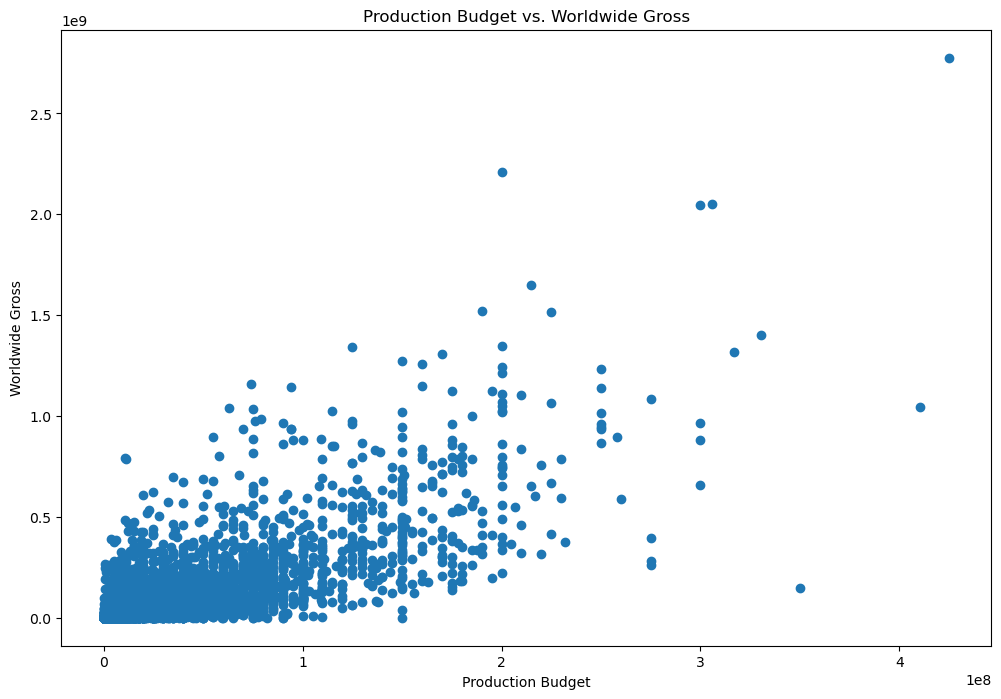

In [20]:
# visualize the relationship between budget and revenue
plt.figure(figsize=(12, 8))
plt.scatter(movie_budgets_df['production_budget'], movie_budgets_df['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross')
plt.show()

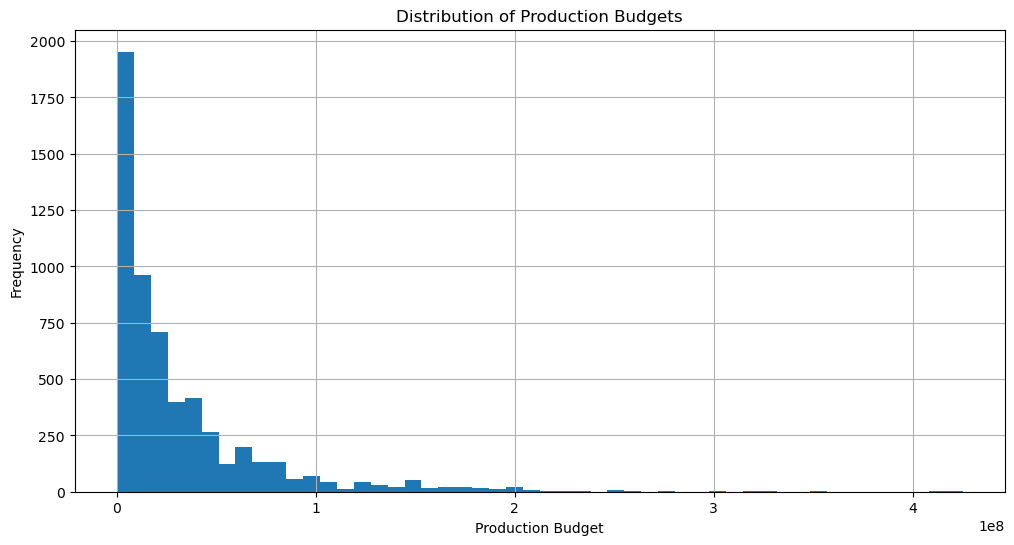

In [22]:
# distribution of production budget
plt.figure(figsize=(12, 6))
movie_budgets_df['production_budget'].hist(bins=50)
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Production Budgets')
plt.show()